In [38]:
from mnist import MNIST
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

(train_X, train_y), (test_X, test_y) = mnist.load_data() #load images and labels

In [39]:
print(train_X.shape)
print(train_X[0].shape)
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1]**2) #reshape images to be vectors

temp_y = []
temp_X = []
for i in range(len(train_y)): #filter out images with label 0 and 1
    if train_y[i] == 0 or train_y[i] == 1:
        temp_y.append(train_y[i])
        temp_X.append(train_X[i])
train_y = np.array(temp_y)
train_X = np.array(temp_X)
train_y

(60000, 28, 28)
(28, 28)


array([0, 1, 1, ..., 1, 0, 1], dtype=uint8)

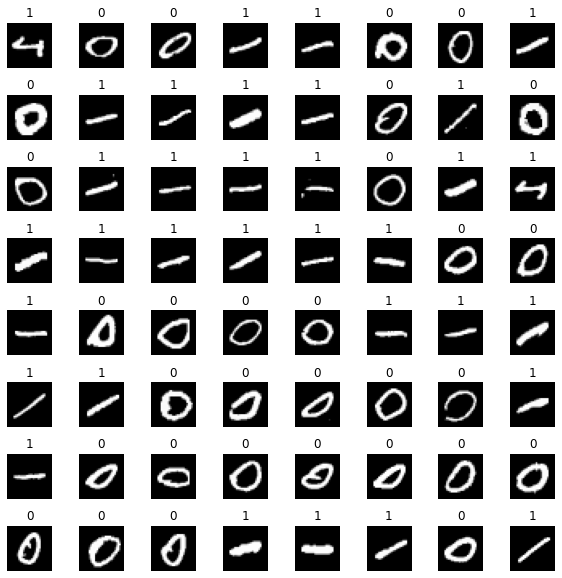

In [46]:
m, n = train_X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices
    X_random_reshaped = train_X[random_index].reshape((28,28)).T
    
    # Display the image and label
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(train_y[random_index])
    ax.set_axis_off()

In [41]:
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),    #specify input size
        Dense(units = 25,activation = "sigmoid"),
        Dense(units =15,activation = "sigmoid"),
        Dense(units =1,activation = "sigmoid")
        
    ], name = "my_model" 
) 
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 25)                19625     
                                                                 
 dense_10 (Dense)            (None, 15)                390       
                                                                 
 dense_11 (Dense)            (None, 1)                 16        
                                                                 
Total params: 20,031
Trainable params: 20,031
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    train_X,train_y,
    epochs=20
)

Epoch 1/20
396/396 [==============================] - 1s 1ms/step - loss: 0.2017
Epoch 2/20
396/396 [==============================] - 0s 1ms/step - loss: 0.0334
Epoch 3/20
396/396 [==============================] - 0s 1ms/step - loss: 0.0172
Epoch 4/20
396/396 [==============================] - 0s 918us/step - loss: 0.0106
Epoch 5/20
396/396 [==============================] - 0s 880us/step - loss: 0.0085
Epoch 6/20
396/396 [==============================] - 0s 958us/step - loss: 0.0066
Epoch 7/20
396/396 [==============================] - 0s 884us/step - loss: 0.0065
Epoch 8/20
396/396 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 9/20
396/396 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 10/20
396/396 [==============================] - 1s 1ms/step - loss: 0.0037
Epoch 11/20
396/396 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 12/20
396/396 [==============================] - 0s 998us/step - loss: 0.0031
Epoch 13/20
396

In [48]:
prediction = model.predict(train_X[0].reshape(1,784))  # a zero
print(f" predicting a {train_y[0]}: {prediction}")
prediction = model.predict(train_X[500].reshape(1,784))  # a one
print(f" predicting a {train_y[500]}:  {prediction}")

prediction = model.predict(train_X[1].reshape(1,784))  # a zero
print(f" predicting a {train_y[1]}: {prediction}")



1/1 [==============================] - 0s 16ms/step
 predicting a 0: [[0.00035572]]
1/1 [==============================] - 0s 24ms/step
 predicting a 0:  [[0.00039044]]
1/1 [==============================] - 0s 16ms/step
 predicting a 1: [[0.99982435]]


In [50]:
if prediction >= 0.6:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


1/1 [==============================] - 0s 26ms/step


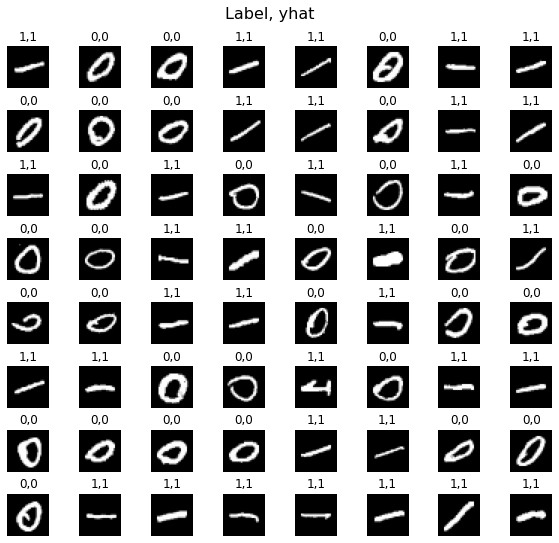

In [54]:
m, n = train_X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = train_X[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(train_X[random_index].reshape(1,784))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{train_y[random_index]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()